# Problem Statement:

    An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

    The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
    
    Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.
    
    As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.
    
    X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.
    
    

In [1]:
#Import the warnimgs and import the required libraries for Data Analytics
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
leads = pd.read_csv("Leads.csv") # Read the data 
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.shape #Found the shape of dataframe

(9240, 37)

In [4]:
leads.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.isnull().sum() # saw the null values each column has

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [6]:
round(100*(leads.isnull().sum())/len(leads.index), 2) # Null Value Percentages

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

## See the distinct values of each variable

In [7]:
# See the distinct values for 'Lead Origin'
leads['Lead Origin'].value_counts()   

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [8]:
# See the distinct values for 'Lead Source'

leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
testone                 1
blog                    1
NC_EDM                  1
welearnblog_Home        1
youtubechannel          1
WeLearn                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [9]:
# See the distinct values for 'Lead Origin'

leads['Do Not Email'].value_counts()    # We found out that the variable 'Do Not Email' is a skewed variable.

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [10]:
# See the distinct values for 'Last Activity'

leads['Last Activity'].value_counts() 

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [11]:
# See the distinct values for 'Country'

leads.Country.value_counts()  #  Found out most of the leads are from 'India'

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
Germany                    4
Kuwait                     4
South Africa               4
Nigeria                    4
Canada                     4
Sweden                     3
Philippines                2
Bangladesh                 2
Belgium                    2
Italy                      2
Asia/Pacific Region        2
China                      2
Netherlands                2
Ghana                      2
Uganda                     2
Liberia                    1
Russia                     1
Switzerland                1
Denmark                    1
Tanzania                   1
Indonesia                  1
Sri Lanka     

In [12]:
# See the distinct values for 'Specialization'

leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [13]:
# See the distinct values for 'How did you hear about X Education'

leads['How did you hear about X Education'].value_counts() # As most of the cells are not assigned, we should do some imputations.

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [14]:
# See the distinct values for 'How did you hear about X Education'

leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [15]:
leads['Do Not Call'].value_counts() # perfectly squed column..... we can drop it


No     9238
Yes       2
Name: Do Not Call, dtype: int64

In [16]:
leads['What matters most to you in choosing a course'].value_counts() # Perfectly sqewed column..... we can drop it.

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [17]:
leads.Magazine.value_counts() # 100% sqewed, we can drop it

No    9240
Name: Magazine, dtype: int64

In [18]:
leads.Search.value_counts() # Sqewed column, we can drop it

No     9226
Yes      14
Name: Search, dtype: int64

In [19]:
leads['Get updates on DM Content'].value_counts() # 100% sqewed, we can drop it

No    9240
Name: Get updates on DM Content, dtype: int64

In [20]:
leads['Newspaper Article'].value_counts() # Sqewed column, we can drop it

No     9238
Yes       2
Name: Newspaper Article, dtype: int64

In [21]:
leads['X Education Forums'].value_counts() # Sqewed column, we can drop it

No     9239
Yes       1
Name: X Education Forums, dtype: int64

In [22]:
leads['Newspaper'].value_counts() # Sqewed column, we can drop it

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [23]:
leads['Digital Advertisement'].value_counts() # Sqewed column, we can drop it

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

In [24]:
leads['Through Recommendations'].value_counts() # Sqewed column, we can drop it

No     9233
Yes       7
Name: Through Recommendations, dtype: int64

In [25]:
leads['Receive More Updates About Our Courses'].value_counts() # Sqewed column, we can drop it

No    9240
Name: Receive More Updates About Our Courses, dtype: int64

In [26]:
leads['Update me on Supply Chain Content'].value_counts() # Sqewed column, we can drop it

No    9240
Name: Update me on Supply Chain Content, dtype: int64

In [27]:
leads['Get updates on DM Content'].value_counts() # Sqewed column, we can drop it

No    9240
Name: Get updates on DM Content, dtype: int64

In [28]:
leads['Lead Profile'].value_counts() # We see 'select' is occupying most of the columns, so there is need to some imputation.

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [29]:
leads['Asymmetrique Activity Index'].value_counts()

02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64

In [30]:
leads['Asymmetrique Profile Index'].value_counts()

02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64

In [31]:
leads['Asymmetrique Activity Score'].value_counts()

14.0    1771
15.0    1293
13.0     775
16.0     467
17.0     349
12.0     196
11.0      95
10.0      57
9.0        9
18.0       5
8.0        4
7.0        1
Name: Asymmetrique Activity Score, dtype: int64

In [32]:
leads['Asymmetrique Profile Score'].value_counts()

15.0    1759
18.0    1071
16.0     599
17.0     579
20.0     308
19.0     245
14.0     226
13.0     204
12.0      22
11.0       9
Name: Asymmetrique Profile Score, dtype: int64

In [33]:
leads['I agree to pay the amount through cheque'].value_counts()  # Sqewed column, we can drop it

No    9240
Name: I agree to pay the amount through cheque, dtype: int64

In [34]:
leads.columns # Let's see the columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

## **`Inference:`**
    1. As many columns has 99 percent same option (Perfectly Sqewed), Those variables won't have any effect on model bulding. Therefore we better drop those columns. 

In [35]:
# Drop the columns which are squewed... 

leads = leads.drop(['Do Not Call', 'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content',
       'I agree to pay the amount through cheque'], 1)

In [36]:
# Let's See the distinct values for 'Tags'

leads['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [37]:
# Let's See the distinct values for 'A free copy of Mastering The Interview'
leads['A free copy of Mastering The Interview'].value_counts()

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [38]:
# Let's See the distinct values for 'Lead Quality'

leads['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

In [39]:
# Let's See the distinct values for 'Lead Profile'

leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [40]:
# Let's See the distinct values for 'Last Notable Activity'

leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Email Received                     1
Form Submitted on Website          1
Resubscribed to emails             1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

In [41]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9204 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Converted                               9240 non-null   int64  
 6   TotalVisits                             9103 non-null   float64
 7   Total Time Spent on Website             9240 non-null   int64  
 8   Page Views Per Visit                    9103 non-null   float64
 9   Last Activity                           9137 non-null   object 
 10  Country                                 6779 non-null   obje

In [42]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,...,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,...,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,...,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,...,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [43]:
leads = leads.drop('Prospect ID', 1) # Drop 'Prospect ID' as it is of less use.

In [44]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,...,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,...,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,...,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [45]:
null_perc = round(leads.isnull().mean()*100,2)
null_perc   

# The null percentage of columns tells us which are the columns to drop immediatly.

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Country                                   26.63
Specialization                            15.56
How did you hear about X Education        23.89
What is your current occupation           29.11
Tags                                      36.29
Lead Quality                              51.59
Lead Profile                              29.32
City                                      15.37
Asymmetrique Activity Index               45.65
Asymmetrique Profile Index                45.65
Asymmetrique Activity Score               45.65
Asymmetrique Profile Score              

In [46]:
# Lets see the columns with null percentage greater than 45% and drop them immediatly,
# as high null value percentage won't help our final model. 

null_perc[null_perc > 45]

Lead Quality                   51.59
Asymmetrique Activity Index    45.65
Asymmetrique Profile Index     45.65
Asymmetrique Activity Score    45.65
Asymmetrique Profile Score     45.65
dtype: float64

In [47]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'Tags', 'Lead Quality', 'Lead Profile', 'City',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [48]:
# Drop the columns with high null percentages

leads = leads.drop(['Lead Quality','Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], 1)

In [49]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9204 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Country                                 6779 non-null   object 
 10  Specialization                          7802 non-null   obje

In [50]:
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,Tags,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Interested in other courses,Select,Select,No,Modified
1,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Ringing,Select,Select,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Will revert after reading the email,Potential Lead,Mumbai,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Ringing,Select,Mumbai,No,Modified
4,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Will revert after reading the email,Select,Mumbai,No,Modified


In [51]:
leads.shape

(9240, 18)

In [52]:
leads['Do Not Email'].value_counts(normalize = True)

No     0.920563
Yes    0.079437
Name: Do Not Email, dtype: float64

In [53]:
leads = leads.drop(['Do Not Email'], axis = 1)  # Drop the column as it is 92% sqewed

In [54]:
leads['Lead Source'].value_counts(normalize = True)  

Google               0.311604
Direct Traffic       0.276293
Olark Chat           0.190678
Organic Search       0.125380
Reference            0.058018
Welingak Website     0.015428
Referral Sites       0.013581
Facebook             0.005976
bing                 0.000652
google               0.000543
Click2call           0.000435
Press_Release        0.000217
Live Chat            0.000217
Social Media         0.000217
testone              0.000109
blog                 0.000109
NC_EDM               0.000109
welearnblog_Home     0.000109
youtubechannel       0.000109
WeLearn              0.000109
Pay per Click Ads    0.000109
Name: Lead Source, dtype: float64

In [55]:
leads['Lead Source'].value_counts() # value counts of 'Lead Source'

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
testone                 1
blog                    1
NC_EDM                  1
welearnblog_Home        1
youtubechannel          1
WeLearn                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [56]:
leads['Lead Source'] = leads['Lead Source'].fillna(leads['Lead Source'].mode()[0])

# Fill the NAN cells with mode.

In [57]:
leads['Lead Source'].value_counts() # It is clearly seen that all NAN cells are replaced with mode. i.e., Google

Google               2904
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
testone                 1
blog                    1
NC_EDM                  1
welearnblog_Home        1
youtubechannel          1
WeLearn                 1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

# Data Preparation

## Modify Column Values

In [58]:
# We saw the number of distinct values is high in number, So we shall have to reduce them for better analysis.
# We shall retain the names of values with high percentages and put all the low percentage values as Others

def Change_Lead_Source_col(x):
    if x == 'google':
        return 'Google'
    elif x == 'Google':
        return 'Google'
    elif x == 'Direct Traffic':
        return 'Direct Traffic'
    elif x == 'Olark Chat':
        return 'Olark Chat'
    elif x == 'Organic Search':
        return 'Organic Search'
    else : 
        return 'Others'


In [59]:
leads['Lead Source'] = leads['Lead Source'].apply(Change_Lead_Source_col) # Lets Apply the modifications as mentioned above.

In [60]:
leads['Lead Source'].value_counts() # Modified value counts

Google            2909
Direct Traffic    2543
Olark Chat        1755
Organic Search    1154
Others             879
Name: Lead Source, dtype: int64

In [61]:
leads['Lead Source'].value_counts(normalize = True) # Modified values in percentrages

Google            0.314827
Direct Traffic    0.275216
Olark Chat        0.189935
Organic Search    0.124892
Others            0.095130
Name: Lead Source, dtype: float64

In [62]:
leads.isnull().sum() # Lets impute the null values of other varibles too in the same way we did it above.

Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Country                                   2461
Specialization                            1438
How did you hear about X Education        2207
What is your current occupation           2690
Tags                                      3353
Lead Profile                              2709
City                                      1420
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [63]:
leads['Last Activity'].value_counts() 

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [64]:
leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Email Received                     1
Form Submitted on Website          1
Resubscribed to emails             1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

In [65]:
# We saw the number of distinct values is high in number, So we shall have to reduce them for better analysis.
# We shall retain the names of values with high percentages and put all the low percentage values as Others

def Change_Last_Activity(x):
    if x == 'Email Opened':
        return 'Email Opened'
    elif x == 'SMS Sent':
        return 'SMS Sent'
    elif x == 'Olark Chat Conversation':
        return 'Olark Chat Conversation'
    else : 
        return 'Others'

In [66]:
# Fill the NAN cells with mode.
leads['Last Activity'] = leads['Last Activity'].fillna(leads['Last Activity'].mode()[0])


In [67]:
leads['Last Activity'] = leads['Last Activity'].apply(Change_Last_Activity) # Apply the modifications as mentioned above

In [68]:
leads['Last Activity'].value_counts(normalize = True)  # Check the modified percentage Value Counts

Email Opened               0.383117
SMS Sent                   0.297078
Others                     0.214502
Olark Chat Conversation    0.105303
Name: Last Activity, dtype: float64

In [69]:
# Fill the NAN cells with mode.
leads['Page Views Per Visit'] = leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].mode()[0])

In [70]:

# Fill the NAN cells with mode.
leads['TotalVisits'] = leads['TotalVisits'].fillna(leads['TotalVisits'].mode()[0])

In [71]:
round(leads.isnull().mean()*100,2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Country                                   26.63
Specialization                            15.56
How did you hear about X Education        23.89
What is your current occupation           29.11
Tags                                      36.29
Lead Profile                              29.32
City                                      15.37
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [72]:
leads.Country.value_counts(normalize = True) # It shows the columns country is skewed and
                             # we can actually drop it or make some necessary modifications after treating Null values.

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
Germany                 0.000590
Kuwait                  0.000590
South Africa            0.000590
Nigeria                 0.000590
Canada                  0.000590
Sweden                  0.000443
Philippines             0.000295
Bangladesh              0.000295
Belgium                 0.000295
Italy                   0.000295
Asia/Pacific Region     0.000295
China                   0.000295
Netherlands             0.000295
Ghana                   0.000295
Uganda                  0.000295
Liberia                 0.000148
Russia                  0.000148
Switzerlan

In [73]:
leads.Country.isnull().mean() # As the null values are high in percentage, we better assign them to mode of that column.

0.2663419913419913

In [74]:
leads.Country =leads.Country.fillna(leads.Country.mode()[0]) # Filled Nan with mode.

In [75]:
# We saw the number of distinct values is high in number, So we shall have to reduce them for better analysis.
# We shall retain the names of values with high percentages and put all the low percentage values as Others


def Change_Country(x):
    if x == 'India':
        return 'India'
    else : 
        return 'Foreign'

#Apply modication made as above mentioned    
leads.Country = leads.Country.apply(Change_Country)

In [76]:
leads.Country.value_counts(normalize = True) # It shows the column is highly sqewed, therefore we can drop it.

India      0.968939
Foreign    0.031061
Name: Country, dtype: float64

In [77]:
leads = leads.drop('Country', 1) # Drop the column 'Country'

In [78]:
round(leads.isnull().mean()*100,2)

Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.00
Converted                                  0.00
TotalVisits                                0.00
Total Time Spent on Website                0.00
Page Views Per Visit                       0.00
Last Activity                              0.00
Specialization                            15.56
How did you hear about X Education        23.89
What is your current occupation           29.11
Tags                                      36.29
Lead Profile                              29.32
City                                      15.37
A free copy of Mastering The Interview     0.00
Last Notable Activity                      0.00
dtype: float64

In [79]:
leads.Specialization.value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [80]:
leads.Specialization.isnull().sum()

1438

In [81]:
(1942+1438)/9240    # The null values are highly overall is about 36.5 percent which is very high in number, therefore drop column.

0.3658008658008658

In [82]:
leads = leads.drop('Specialization', 1) # drop the column 'Specialization'

In [83]:
leads['How did you hear about X Education'].value_counts() # here the 'Select' is almost 50 percent 

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [84]:
leads['How did you hear about X Education'].isnull().sum() # The null values and select accounts to around 75% of cells,
# Therefore we drop the column.

2207

In [85]:
leads = leads.drop('How did you hear about X Education', 1) # Drop the column 'How did you hear about X Education'

In [86]:
leads['What is your current occupation'].value_counts() 

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [87]:
leads['What is your current occupation'].isnull().sum()

2690

In [88]:
# Fill the NAN cells with mode and see the fresh value counts.
leads['What is your current occupation'].fillna('Unemployed', inplace = True)
leads['What is your current occupation'].value_counts()

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [89]:
leads['What is your current occupation'].value_counts(normalize = True)
# The column is 90% sqewed, therefore we better drop the column.

Unemployed              0.897186
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [90]:
leads = leads.drop('What is your current occupation', 1) # Drop the column the 'What is your current occupation'

In [91]:
leads.Tags.value_counts()   # Un_modified value counts of Tags column

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [92]:
leads.Tags.isnull().sum() 

3353

In [93]:
# Fill the NAN cells with mode.
leads.Tags = leads.Tags.fillna(leads.Tags.mode()[0])

In [94]:
# We saw the number of distinct values is high in number, So we shall have to reduce them for better analysis.
# We shall retain the names of values with high percentages and put all the low percentage values as Others


def Change_Tags(x):
    if x == 'Will revert after reading the email':
        return 'Will revert after reading the email'
    elif x == 'Ringing':
        return 'Ringing'
    elif x == 'Already a student':
        return 'Already a student'
    else: 
        return 'Other Reasons'

#Apply the modifications made above
leads.Tags = leads.Tags.apply(Change_Tags)

In [95]:
# lets see the modified value counts
leads.Tags.value_counts()

Will revert after reading the email    5425
Other Reasons                          2147
Ringing                                1203
Already a student                       465
Name: Tags, dtype: int64

In [96]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Tags                                    9240 non-null   object 
 9   Lead Profile                            6531 non-null   object 
 10  City                                    7820 non-null   obje

In [97]:
leads['Lead Profile'].value_counts()  

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [98]:
leads['Lead Profile'].isnull().sum()

2709

In [99]:
# Fill the NAN cells with mode.
leads['Lead Profile'].fillna('Select', inplace =  True)


In [100]:
# Modify the column accordingly

def Change_Lead_Profile(x):
    if x == 'Select':
        return 'Other Leads'
    elif x == 'Potential Lead':
        return 'Potential Lead'
    elif x == 'Other Leads':
        return 'Other Leads'
    else: 
        return 'diploma_dual_n_SomeSchool_lead'

# Apply the modifications
leads['Lead Profile'] = leads['Lead Profile'].apply(Change_Lead_Profile)

In [101]:
leads['Lead Profile'].value_counts(normalize = True) # Checked the percentage value counts and decided not to drop.

Other Leads                       0.794589
Potential Lead                    0.174567
diploma_dual_n_SomeSchool_lead    0.030844
Name: Lead Profile, dtype: float64

In [102]:
leads.City.value_counts(normalize = True) 

Mumbai                         0.412020
Select                         0.287596
Thane & Outskirts              0.096164
Other Cities                   0.087724
Other Cities of Maharashtra    0.058440
Other Metro Cities             0.048593
Tier II Cities                 0.009463
Name: City, dtype: float64

In [103]:
leads.City.value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [104]:
leads.City.isnull().sum()

1420

In [105]:
leads.City.fillna('Other Cities', inplace = True) # As we don't know the which city is the Nan cells belong to,
                                                  # We better replace them as Other cities
leads.City.value_counts(normalize = True)     # Checked the percentage value counts and clearly it is non-sqewed column.

Mumbai                         0.348701
Select                         0.243398
Other Cities                   0.227922
Thane & Outskirts              0.081385
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [106]:
leads.City.value_counts()  

Mumbai                         3222
Select                         2249
Other Cities                   2106
Thane & Outskirts               752
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [107]:
# Make the modifications to city column accordingly 

def Change_City(x):
    if x == 'Mumbai':
        return 'Mumbai'
    elif x == 'Thane & Outskirts':
        return 'Other Cities of Maharashtra'
    elif x == 'Other Cities of Maharashtra':
        return 'Other Cities of Maharashtra'
    else: 
        return 'Other Cities'

# Aplly the changes to city column.   
leads['City'] = leads['City'].apply(Change_City)

In [108]:
# lets see the value counts after modifications
leads.City.value_counts()

Other Cities                   4809
Mumbai                         3222
Other Cities of Maharashtra    1209
Name: City, dtype: int64

In [109]:
leads['A free copy of Mastering The Interview'].value_counts() # we can apply binary mapping to this column

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [110]:
leads['Last Notable Activity'].value_counts()

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
View in browser link Clicked       1
Email Received                     1
Form Submitted on Website          1
Resubscribed to emails             1
Approached upfront                 1
Name: Last Notable Activity, dtype: int64

In [111]:
# Define the changes to be made to 'Last Notable Activity' column and apply the changes
def Change_Last_Notable_Activity(x):
    if x == 'Modified':
        return 'Modified'
    elif x == 'Email Opened':
        return 'Email Opened'
    elif x == 'SMS Sent':
        return 'SMS Sent'
    else: 
        return 'Other_Activity'

leads['Last Notable Activity'] = leads['Last Notable Activity'].apply(Change_Last_Notable_Activity)

In [112]:
leads['Last Notable Activity'].value_counts() # Modified value counts

Modified          3407
Email Opened      2827
SMS Sent          2172
Other_Activity     834
Name: Last Notable Activity, dtype: int64

In [113]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Tags                                    9240 non-null   object 
 9   Lead Profile                            9240 non-null   object 
 10  City                                    9240 non-null   obje

In [114]:
leads.Converted.value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

In [115]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the column
leads[['A free copy of Mastering The Interview']] = leads[['A free copy of Mastering The Interview']].apply(binary_map)

In [116]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9240 non-null   object 
 3   Converted                               9240 non-null   int64  
 4   TotalVisits                             9240 non-null   float64
 5   Total Time Spent on Website             9240 non-null   int64  
 6   Page Views Per Visit                    9240 non-null   float64
 7   Last Activity                           9240 non-null   object 
 8   Tags                                    9240 non-null   object 
 9   Lead Profile                            9240 non-null   object 
 10  City                                    9240 non-null   obje

In [117]:
leads.columns

Index(['Lead Number', 'Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Tags', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [118]:
leads = leads.drop('Lead Number', 1)

In [119]:
leads.columns # Columns remaining after droping highly sqewed columns, high % null columns and not required columns

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Tags', 'Lead Profile', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [120]:
leads.shape

(9240, 12)

In [121]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Tags', 'Lead Profile', 'City',
                               'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

In [122]:
leads.head() # after concat we see 33 columns

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Tags,Lead Profile,City,...,Tags_Other Reasons,Tags_Ringing,Tags_Will revert after reading the email,Lead Profile_Potential Lead,Lead Profile_diploma_dual_n_SomeSchool_lead,City_Other Cities,City_Other Cities of Maharashtra,Last Notable Activity_Modified,Last Notable Activity_Other_Activity,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0.0,0,0.0,Others,Other Reasons,Other Leads,Other Cities,...,1,0,0,0,0,1,0,1,0,0
1,API,Organic Search,0,5.0,674,2.5,Email Opened,Ringing,Other Leads,Other Cities,...,0,1,0,0,0,1,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Will revert after reading the email,Potential Lead,Mumbai,...,0,0,1,1,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Others,Ringing,Other Leads,Mumbai,...,0,1,0,0,0,0,0,1,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.0,Others,Will revert after reading the email,Other Leads,Mumbai,...,0,0,1,0,0,0,0,1,0,0


In [123]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Lead Origin                                  9240 non-null   object 
 1   Lead Source                                  9240 non-null   object 
 2   Converted                                    9240 non-null   int64  
 3   TotalVisits                                  9240 non-null   float64
 4   Total Time Spent on Website                  9240 non-null   int64  
 5   Page Views Per Visit                         9240 non-null   float64
 6   Last Activity                                9240 non-null   object 
 7   Tags                                         9240 non-null   object 
 8   Lead Profile                                 9240 non-null   object 
 9   City                                         9240 non-null   object 
 10  

In [124]:
# Drop the categorical columns after creating dummines
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Tags', 'Lead Profile', 'City',
                               'Last Notable Activity'], axis = 1)

In [125]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Converted                                    9240 non-null   int64  
 1   TotalVisits                                  9240 non-null   float64
 2   Total Time Spent on Website                  9240 non-null   int64  
 3   Page Views Per Visit                         9240 non-null   float64
 4   A free copy of Mastering The Interview       9240 non-null   int64  
 5   Lead Origin_Landing Page Submission          9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                    9240 non-null   uint8  
 7   Lead Origin_Lead Import                      9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                   9240 non-null   uint8  
 9   Lead Source_Google                           9240 non-null   uint8  
 10  

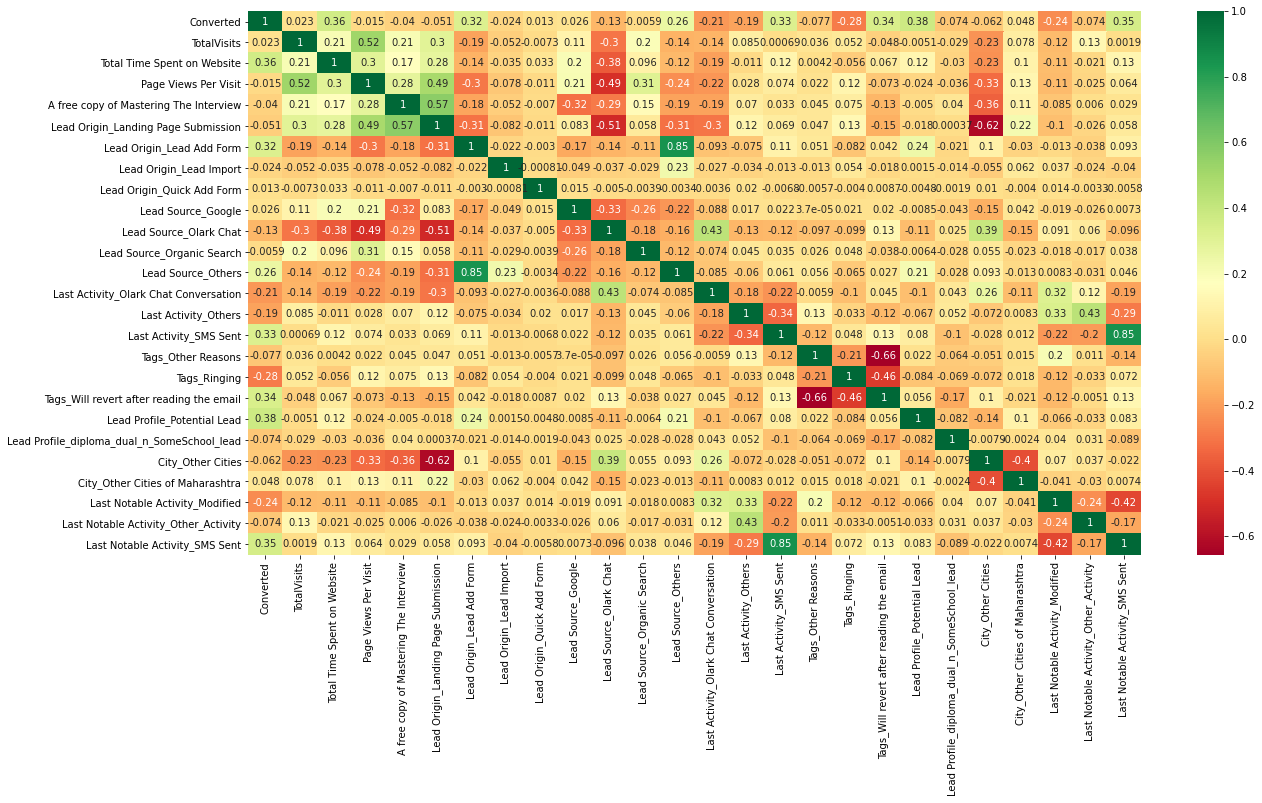

In [126]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads.corr(),annot = True , cmap = 'RdYlGn')
plt.show()

## Inference:
   1. The **`(last Activity_SMS sent and Last Notable Activity_SMS sent)`** and **`Lead Source_Others and Lead Origin_Lead add form`** are having the highest correlation. So that we can drop any one of them.

In [127]:
leads = leads.drop(['Last Activity_SMS Sent', 'Lead Source_Others'],1) # Drop the highly corellated columns.

## Model Building
Let's start by splitting our data into a training set and a test set.

### Test-Train Split & Feature Scaling

In [128]:
# import the train_test_split and StandardScaler from scikit Learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [129]:
# Putting feature variables to X
X = leads.drop('Converted', axis=1) 

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,...,Tags_Other Reasons,Tags_Ringing,Tags_Will revert after reading the email,Lead Profile_Potential Lead,Lead Profile_diploma_dual_n_SomeSchool_lead,City_Other Cities,City_Other Cities of Maharashtra,Last Notable Activity_Modified,Last Notable Activity_Other_Activity,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,0,0,1,...,1,0,0,0,0,1,0,1,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2.0,1532,2.0,1,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,1.0,305,1.0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4,2.0,1428,1.0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [130]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [131]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [132]:
# Instantiate the object.
scaler = StandardScaler()

# create a var-list to fit, we shall only take numeric variables to fit, 
# since the scalling wont show any effect on categorical variables as they are already in between 0 and 1

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Google,Lead Source_Olark Chat,...,Tags_Other Reasons,Tags_Ringing,Tags_Will revert after reading the email,Lead Profile_Potential Lead,Lead Profile_diploma_dual_n_SomeSchool_lead,City_Other Cities,City_Other Cities of Maharashtra,Last Notable Activity_Modified,Last Notable Activity_Other_Activity,Last Notable Activity_SMS Sent
1871,-0.645678,-0.885371,-1.062143,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
6795,0.109111,0.005716,-0.452487,1,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3516,0.297808,-0.691418,0.083827,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
8105,0.297808,1.365219,1.229797,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3934,-0.645678,-0.885371,-1.062143,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,0


In [133]:
### Checking the converted Rate
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

38.53896103896104

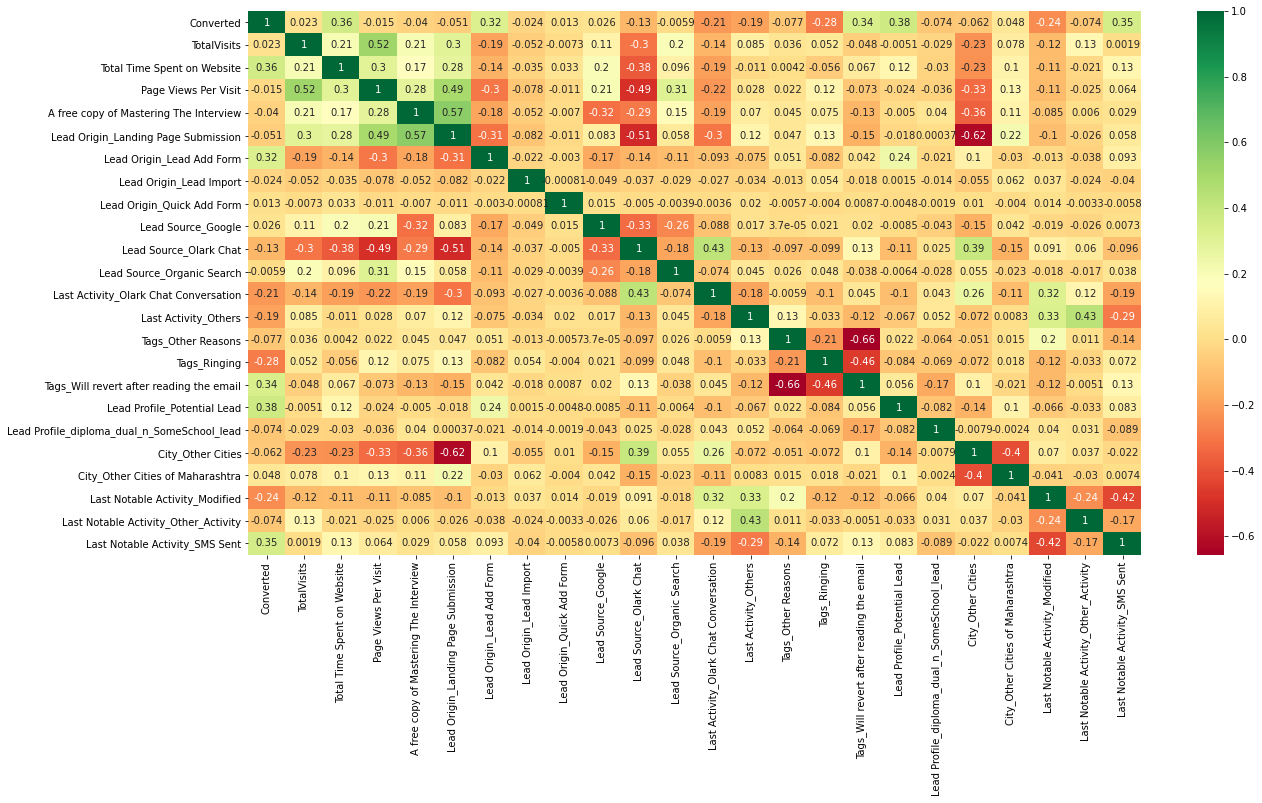

In [134]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads.corr(),annot = True , cmap = 'RdYlGn')
plt.show()

In [135]:
# import statsmodels for better analytics
import statsmodels.api as sm  

In [136]:
# Logistic regression model using GLM (Generalized linear model)  and by using binomial family of distribution curves
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6444
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2072.8
Date:                Mon, 08 Feb 2021   Deviance:                       4145.7
Time:                        19:07:00   Pearson chi2:                 1.23e+04
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -7.2463      0.866     -8.365      0.000      -8.944      -5.548
TotalVisits                                     0.1284      0.047      2.755      0.006       0.037       0.220
Total Time Spent on Website                     1.1420      0.047     24.297      0.000       1.050       1.234
Page Views Per Visit                           -0.0595      0.056     -1.058      0.290      -0.170       0.051
A free copy of Mastering The Interview         -0.0178      0.119     -0.150      0.881      -0.251       0.215
Lead Origin_Landing Page Submission            -0.0984      0.135     -0.731      0.465      -0.362       0.165
Lead Origin_Lead Add Form                       3.9739      0.254     15.673      0.000       3.477       4.471
Lead Origin_Lead Import                         0.0070      0.629      0.011      0.991      -1.225       1.239
Lead Origin_Quick Add Form                     18.8760   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Google                              0.1611      0.123      1.313      0.189      -0.079       0.402
Lead Source_Olark Chat                          0.9681      0.172      5.629      0.000       0.631       1.305
Lead Source_Organic Search                      0.0806      0.144      0.561      0.574      -0.201       0.362
Last Activity_Olark Chat Conversation          -1.5927      0.201     -7.925      0.000      -1.987      -1.199
Last Activity_Others                           -0.9061      0.149     -6.092      0.000      -1.198      -0.615
Tags_Other Reasons                              5.3981      0.847      6.370      0.000       3.737       7.059
Tags_Ringing                                    1.5983      0.879      1.818      0.069      -0.125       3.321
Tags_Will revert after reading the email        6.5561      0.847      7.738      0.000       4.896       8.217
Lead Profile_Potential Lead                     2.3332      0.122     19.159      0.000       2.095       2.572
Lead Profile_diploma_dual_n_SomeSchool_lead     2.6667      0.533      5.001      0.000       1.622       3.712
City_Other Cities                              -0.1218      0.114     -1.068      0.286      -0.345       0.102
City_Other Cities of Maharashtra                0.0074      0.130      0.056      0.955      -0.248       0.263
Last Notable Activity_Modified                 -0.3547      0.119     -2.991      0.003      -0.587      -0.122
Last Notable Activity_Other_Activity            0.4200      0.201      2.085      0.037       0.025       0.815
Last Notable Activity_SMS Sent                  1.7577      0.110     16.041      0.000       1.543       1.972
===========================================================

### Model Building through RFE (Recursive feature elimination)


#### RFE


In [137]:
# import the required scikit learn libraries
from sklearn.linear_model import LogisticRegression

#Instantiate LogisticRegression
logreg = LogisticRegression()

In [138]:

from sklearn.feature_selection import RFE

# assign number of variable for automatic selection
rfe = RFE(logreg, 15)   

# fit the rfe model
rfe = rfe.fit(X_train, y_train)

In [139]:
# Lets look at which are the variable with high significance and which are low
rfe.support_

array([False,  True, False, False,  True,  True, False, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True])

In [140]:
# Lets see all the column names and their corresponding significance and ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 4),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('A free copy of Mastering The Interview', False, 8),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 7),
 ('Lead Origin_Quick Add Form', False, 2),
 ('Lead Source_Google', False, 3),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 6),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Tags_Other Reasons', True, 1),
 ('Tags_Ringing', True, 1),
 ('Tags_Will revert after reading the email', True, 1),
 ('Lead Profile_Potential Lead', True, 1),
 ('Lead Profile_diploma_dual_n_SomeSchool_lead', True, 1),
 ('City_Other Cities', True, 1),
 ('City_Other Cities of Maharashtra', False, 9),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Other_Activity', True, 1),
 ('Last Notable Activity_SMS Sent', True, 1)]

In [141]:
# lets create a list with columns of highest significance
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Tags_Other Reasons', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Lead Profile_Potential Lead',
       'Lead Profile_diploma_dual_n_SomeSchool_lead', 'City_Other Cities',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Other_Activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [142]:
# Columns with low significance
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Google',
       'Lead Source_Organic Search', 'City_Other Cities of Maharashtra'],
      dtype='object')

In [143]:
# Add a constant
X_train_sm = sm.add_constant(X_train[col])

# Create a Logestic regression model using GLM
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

#Fit the model
res = logm2.fit()

# view the summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2080.1
Date:                Mon, 08 Feb 2021   Deviance:                       4160.3
Time:                        19:07:01   Pearson chi2:                 1.20e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -7.0899      0.854     -8.305      0.000      -8.763      -5.417
Total Time Spent on Website                     1.1444      0.047     24.492      0.000       1.053       1.236
Lead Origin_Landing Page Submission            -0.1743      0.120     -1.454      0.146      -0.409       0.061
Lead Origin_Lead Add Form                       3.8381      0.231     16.629      0.000       3.386       4.291
Lead Source_Olark Chat                          0.8277      0.134      6.197      0.000       0.566       1.089
Last Activity_Olark Chat Conversation          -1.6052      0.201     -7.991      0.000      -1.999      -1.212
Last Activity_Others                           -0.9073      0.148     -6.142      0.000      -1.197      -0.618
Tags_Other Reasons                              5.4013      0.844      6.400      0.000       3.747       7.055
Tags_Ringing                                    1.5918      0.876      1.818      0.069      -0.125       3.308
Tags_Will revert after reading the email        6.5593      0.844      7.774      0.000       4.906       8.213
Lead Profile_Potential Lead                     2.3304      0.122     19.166      0.000       2.092       2.569
Lead Profile_diploma_dual_n_SomeSchool_lead     2.6257      0.529      4.965      0.000       1.589       3.662
City_Other Cities                              -0.1586      0.104     -1.521      0.128      -0.363       0.046
Last Notable Activity_Modified                 -0.3619      0.118     -3.059      0.002      -0.594      -0.130
Last Notable Activity_Other_Activity            0.5002      0.199      2.518      0.012       0.111       0.890
Last Notable Activity_SMS Sent                  1.7456      0.109     16.002      0.000       1.532       1.959
===============================================================================================================
"""

## Inference: 
   1. Clearly **`Lead Origin_Landing Page Submission`** is exceeding the permissible p_value, we shall have to drop it first.

In [144]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.002894
6795    0.297982
3516    0.003611
8105    0.085918
3934    0.225033
4844    0.995942
3297    0.001490
8071    0.948412
987     0.220110
7423    0.996482
dtype: float64

In [145]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [146]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,5.82
1,Lead Origin_Landing Page Submission,4.00
12,Last Notable Activity_Modified,3.93
11,City_Other Cities,3.20
6,Tags_Other Reasons,3.03
5,Last Activity_Others,3.02
13,Last Notable Activity_Other_Activity,2.39
3,Lead Source_Olark Chat,2.27
4,Last Activity_Olark Chat Conversation,2.08
7,Tags_Ringing,2.06


In [147]:
# Drop the column with high p_value and assign the remaining to the same
col = col.drop('Lead Origin_Landing Page Submission', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Tags_Other Reasons', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Lead Profile_Potential Lead',
       'Lead Profile_diploma_dual_n_SomeSchool_lead', 'City_Other Cities',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Other_Activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [148]:
# Let's re-run the model using the selected variables

# Add a constant
X_train_sm = sm.add_constant(X_train[col])

# Create a Logestic regression model using GLM
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

#Fit the model
res = logm3.fit()

# view the summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2081.2
Date:                Mon, 08 Feb 2021   Deviance:                       4162.4
Time:                        19:07:01   Pearson chi2:                 1.19e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -7.2525      0.846     -8.577      0.000      -8.910      -5.595
Total Time Spent on Website                     1.1451      0.047     24.498      0.000       1.053       1.237
Lead Origin_Lead Add Form                       3.9370      0.221     17.825      0.000       3.504       4.370
Lead Source_Olark Chat                          0.9087      0.122      7.461      0.000       0.670       1.147
Last Activity_Olark Chat Conversation          -1.5879      0.200     -7.926      0.000      -1.981      -1.195
Last Activity_Others                           -0.9107      0.148     -6.167      0.000      -1.200      -0.621
Tags_Other Reasons                              5.3991      0.843      6.406      0.000       3.747       7.051
Tags_Ringing                                    1.5858      0.875      1.813      0.070      -0.129       3.300
Tags_Will revert after reading the email        6.5673      0.843      7.794      0.000       4.916       8.219
Lead Profile_Potential Lead                     2.3417      0.121     19.279      0.000       2.104       2.580
Lead Profile_diploma_dual_n_SomeSchool_lead     2.6230      0.526      4.984      0.000       1.591       3.655
City_Other Cities                              -0.0802      0.089     -0.900      0.368      -0.255       0.094
Last Notable Activity_Modified                 -0.3600      0.118     -3.045      0.002      -0.592      -0.128
Last Notable Activity_Other_Activity            0.5004      0.199      2.521      0.012       0.111       0.890
Last Notable Activity_SMS Sent                  1.7384      0.109     15.958      0.000       1.525       1.952
===============================================================================================================
"""

In [149]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Last Notable Activity_Modified,3.92
7,Tags_Will revert after reading the email,3.19
4,Last Activity_Others,3.01
10,City_Other Cities,2.62
12,Last Notable Activity_Other_Activity,2.38
3,Last Activity_Olark Chat Conversation,2.08
2,Lead Source_Olark Chat,2.00
5,Tags_Other Reasons,1.90
13,Last Notable Activity_SMS Sent,1.81
8,Lead Profile_Potential Lead,1.36


In [150]:
# Drop the column with high p_value and assign the remaining to the same
col = col.drop('City_Other Cities',1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Tags_Other Reasons', 'Tags_Ringing',
       'Tags_Will revert after reading the email',
       'Lead Profile_Potential Lead',
       'Lead Profile_diploma_dual_n_SomeSchool_lead',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Other_Activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [151]:

# Add a constant
X_train_sm = sm.add_constant(X_train[col])

# Create a Logestic regression model using GLM
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

#Fit the model
res = logm4.fit()

# view the summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2081.6
Date:                Mon, 08 Feb 2021   Deviance:                       4163.2
Time:                        19:07:01   Pearson chi2:                 1.20e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -7.2893      0.844     -8.633      0.000      -8.944      -5.634
Total Time Spent on Website                     1.1456      0.047     24.518      0.000       1.054       1.237
Lead Origin_Lead Add Form                       3.9054      0.218     17.944      0.000       3.479       4.332
Lead Source_Olark Chat                          0.8706      0.114      7.642      0.000       0.647       1.094
Last Activity_Olark Chat Conversation          -1.5947      0.200     -7.971      0.000      -1.987      -1.203
Last Activity_Others                           -0.9084      0.148     -6.151      0.000      -1.198      -0.619
Tags_Other Reasons                              5.4041      0.843      6.414      0.000       3.753       7.056
Tags_Ringing                                    1.5905      0.874      1.819      0.069      -0.123       3.304
Tags_Will revert after reading the email        6.5686      0.842      7.798      0.000       4.918       8.220
Lead Profile_Potential Lead                     2.3587      0.120     19.647      0.000       2.123       2.594
Lead Profile_diploma_dual_n_SomeSchool_lead     2.6288      0.526      4.995      0.000       1.597       3.660
Last Notable Activity_Modified                 -0.3612      0.118     -3.056      0.002      -0.593      -0.130
Last Notable Activity_Other_Activity            0.4945      0.198      2.492      0.013       0.106       0.883
Last Notable Activity_SMS Sent                  1.7383      0.109     15.955      0.000       1.525       1.952
===============================================================================================================
"""

In [152]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Last Notable Activity_Modified,3.92
4,Last Activity_Others,3.01
7,Tags_Will revert after reading the email,2.71
11,Last Notable Activity_Other_Activity,2.38
3,Last Activity_Olark Chat Conversation,2.07
2,Lead Source_Olark Chat,1.81
12,Last Notable Activity_SMS Sent,1.80
5,Tags_Other Reasons,1.75
8,Lead Profile_Potential Lead,1.34
1,Lead Origin_Lead Add Form,1.31


In [153]:
# Drop the column with high p_value and assign the remaining to the same
col = col.drop('Tags_Ringing',1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Tags_Other Reasons',
       'Tags_Will revert after reading the email',
       'Lead Profile_Potential Lead',
       'Lead Profile_diploma_dual_n_SomeSchool_lead',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Other_Activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [154]:
# Let's re-run the model using the selected variables
# Add a constant
X_train_sm = sm.add_constant(X_train[col])

# Create a Logestic regression model using GLM
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())

#Fit the model
res = logm5.fit()

# view the summary
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2083.7
Date:                Mon, 08 Feb 2021   Deviance:                       4167.5
Time:                        19:07:01   Pearson chi2:                 1.30e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -5.8897      0.252    -23.399      0.000      -6.383      -5.396
Total Time Spent on Website                     1.1433      0.047     24.528      0.000       1.052       1.235
Lead Origin_Lead Add Form                       3.9294      0.219     17.924      0.000       3.500       4.359
Lead Source_Olark Chat                          0.8624      0.114      7.587      0.000       0.640       1.085
Last Activity_Olark Chat Conversation          -1.5954      0.200     -7.979      0.000      -1.987      -1.203
Last Activity_Others                           -0.9102      0.148     -6.170      0.000      -1.199      -0.621
Tags_Other Reasons                              4.0029      0.245     16.311      0.000       3.522       4.484
Tags_Will revert after reading the email        5.1671      0.243     21.299      0.000       4.692       5.643
Lead Profile_Potential Lead                     2.3601      0.120     19.636      0.000       2.125       2.596
Lead Profile_diploma_dual_n_SomeSchool_lead     2.1215      0.390      5.440      0.000       1.357       2.886
Last Notable Activity_Modified                 -0.3564      0.118     -3.021      0.003      -0.588      -0.125
Last Notable Activity_Other_Activity            0.4978      0.198      2.513      0.012       0.109       0.886
Last Notable Activity_SMS Sent                  1.7589      0.109     16.170      0.000       1.546       1.972
===============================================================================================================
"""

In [155]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Notable Activity_Modified,3.70
4,Last Activity_Others,3.01
6,Tags_Will revert after reading the email,2.44
10,Last Notable Activity_Other_Activity,2.32
3,Last Activity_Olark Chat Conversation,2.06
2,Lead Source_Olark Chat,1.81
5,Tags_Other Reasons,1.64
11,Last Notable Activity_SMS Sent,1.54
7,Lead Profile_Potential Lead,1.33
1,Lead Origin_Lead Add Form,1.31


In [156]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1) # Reshape it into an array

In [157]:
y_train_pred[:10]

array([0.00237706, 0.32826481, 0.00296543, 0.07109695, 0.2263885 ,
       0.99603488, 0.00120014, 0.94465336, 0.21474688, 0.99650826])

In [158]:
# Convert the values in array to a data_frame and name them
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})

# Assign an ID to the training set
y_train_pred_final['StudID'] = y_train.index


y_train_pred_final.head()

,Converted,Converted_Prob,StudID
0,0,0.002377,1871
1,0,0.328265,6795
2,0,0.002965,3516
3,0,0.071097,8105
4,0,0.226388,3934


In [159]:
# Assume a rough treashold value, say 0.5 and predict the lead conversion 
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.tail()

,Converted,Converted_Prob,StudID,predicted
6463,1,0.986824,350,1
6464,1,0.996575,79,1
6465,1,0.294755,8039,0
6466,0,0.024897,6936,0
6467,0,0.226388,5640,0


In [160]:
from sklearn import metrics # import metrics from sciket learn

In [161]:
# Print Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3667  335]
 [ 486 1980]]


In [162]:
# Predicted            Non_Converted   Converted
# Actual
# not_Converted        3667             335
# Converted            486              1980  

In [163]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8730674087816945


In [164]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [165]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8029197080291971

In [166]:
# Let us calculate specificity
TN / float(TN+FP)

0.9162918540729635

In [167]:
# Calculate false postive rate - predicting converted when student had not got converted
print(FP/ float(TN+FP)) 

0.08370814592703649


In [168]:
# positive predictive value 
print (TP / float(TP+FP))

0.8552915766738661


In [169]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8829761618107392


###  Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [170]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [171]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

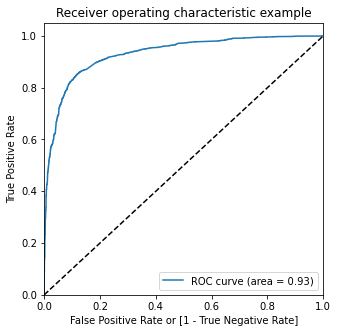

In [172]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

###  Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [173]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.tail()

,Converted,Converted_Prob,StudID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
6463,1,0.986824,350,1,1,1,1,1,1,1,1,1,1,1
6464,1,0.996575,79,1,1,1,1,1,1,1,1,1,1,1
6465,1,0.294755,8039,0,1,1,1,0,0,0,0,0,0,0
6466,0,0.024897,6936,0,1,0,0,0,0,0,0,0,0,0
6467,0,0.226388,5640,0,1,1,1,0,0,0,0,0,0,0


In [174]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.706246  0.963909  0.547476
0.2   0.2  0.795300  0.929846  0.712394
0.3   0.3  0.859617  0.869830  0.853323
0.4   0.4  0.872294  0.836172  0.894553
0.5   0.5  0.873067  0.802920  0.916292
0.6   0.6  0.864409  0.746148  0.937281
0.7   0.7  0.846939  0.671127  0.955272
0.8   0.8  0.820037  0.565693  0.976762
0.9   0.9  0.779221  0.439984  0.988256


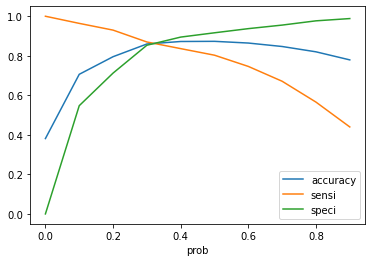

In [175]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

## Inference: 
   1. With the help of above plot, we can select a threshold probability value by having a trade_off between accuracy, Sensitivity and Specificity. 
   2. It clearly says, we can take Threshold probability **`x = 0.3`**.

In [176]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,StudID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.002377,1871,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.328265,6795,0,1,1,1,1,0,0,0,0,0,0,1
2,0,0.002965,3516,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.071097,8105,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.226388,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [177]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8596165739022882

In [178]:
# Let's again print the confusion matric with the final predicted lead conversion by the model (X=0.3)
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3415,  587],
       [ 321, 2145]], dtype=int64)

In [179]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [180]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8698296836982968

In [181]:
# Let us calculate specificity
TN / float(TN+FP)

0.8533233383308346

In [182]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1466766616691654


In [183]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7851390922401171


In [184]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9140792291220556


## Precision and Recall

In [185]:
#Looking at the confusion matrix again
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3667,  335],
       [ 486, 1980]], dtype=int64)

##### Precision
TP / TP + FP

In [186]:
confusion[1,1]/(confusion[0,1]+confusion[1,1]) # CEO expecting atleast 80%, but we got around 85 %. Therefore the model is satisfying the demands of CEO

0.8552915766738661

##### Recall
TP / TP + FN

In [187]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8029197080291971

In [188]:
from sklearn.metrics import precision_score, recall_score

In [189]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8552915766738661

In [190]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8029197080291971

### Precision and recall tradeoff

In [191]:
from sklearn.metrics import precision_recall_curve

In [192]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [193]:
y_train_pred_final.tail()

,Converted,Converted_Prob,StudID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
6463,1,0.986824,350,1,1,1,1,1,1,1,1,1,1,1,1
6464,1,0.996575,79,1,1,1,1,1,1,1,1,1,1,1,1
6465,1,0.294755,8039,0,1,1,1,0,0,0,0,0,0,0,0
6466,0,0.024897,6936,0,1,0,0,0,0,0,0,0,0,0,0
6467,0,0.226388,5640,0,1,1,1,0,0,0,0,0,0,0,0


In [194]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

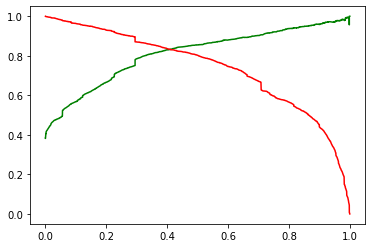

In [195]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Inference: 
   1. By looking at the Precision and Recall Tradeoff, we can go with a probability threshold value as **`x = 0.41`**

### Making predictions on the test set

In [196]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [197]:
# Lets take only the final columns after treating them for high P_value and High VIF's
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Olark Chat Conversation,Last Activity_Others,Tags_Other Reasons,Tags_Will revert after reading the email,Lead Profile_Potential Lead,Lead Profile_diploma_dual_n_SomeSchool_lead,Last Notable Activity_Modified,Last Notable Activity_Other_Activity,Last Notable Activity_SMS Sent
4269,0.933036,0,0,0,0,0,1,0,0,0,0,1
2376,-0.900812,1,0,0,0,0,1,0,0,0,0,1
7766,-0.793792,0,0,0,1,0,1,0,0,0,1,0
9199,-0.900812,0,1,1,0,0,0,1,0,1,0,0
4359,-0.900812,1,0,0,0,0,1,1,0,0,0,0


In [198]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 12 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Total Time Spent on Website                  2772 non-null   float64
 1   Lead Origin_Lead Add Form                    2772 non-null   uint8  
 2   Lead Source_Olark Chat                       2772 non-null   uint8  
 3   Last Activity_Olark Chat Conversation        2772 non-null   uint8  
 4   Last Activity_Others                         2772 non-null   uint8  
 5   Tags_Other Reasons                           2772 non-null   uint8  
 6   Tags_Will revert after reading the email     2772 non-null   uint8  
 7   Lead Profile_Potential Lead                  2772 non-null   uint8  
 8   Lead Profile_diploma_dual_n_SomeSchool_lead  2772 non-null   uint8  
 9   Last Notable Activity_Modified               2772 non-null   uint8  
 1

In [199]:
# Add constant
X_test_sm = sm.add_constant(X_test)

In [200]:
# Lets see the predicticed probalilities in the test set
y_test_pred = res.predict(X_test_sm)

In [201]:

y_test_pred[:10]

4269    0.891198
2376    0.980844
7766    0.114801
9199    0.003509
4359    0.989408
9186    0.974311
1631    0.937520
8963    0.761949
8007    0.090648
5324    0.583754
dtype: float64

In [202]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [203]:
# Let's see the head
y_pred_1.head()

,0
4269,0.891198
2376,0.980844
7766,0.114801
9199,0.003509
4359,0.989408


In [204]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [205]:
# Putting CustID to index
y_test_df['StudID'] = y_test_df.index

In [206]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [207]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [208]:
y_pred_final.head()

,Converted,StudID,0
0,1,4269,0.891198
1,1,2376,0.980844
2,1,7766,0.114801
3,0,9199,0.003509
4,1,4359,0.989408


In [209]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [210]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Converted,StudID,Converted_Prob
0,1,4269,0.891198
1,1,2376,0.980844
2,1,7766,0.114801
3,0,9199,0.003509
4,1,4359,0.989408


In [211]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.41 else 0)
# Here we took x= 0.41, which is the trade off probability value from precision and Recall.

In [212]:
y_pred_final.head() # Head of the test set showing actual converted and predicted values.

,Converted,StudID,Converted_Prob,final_predicted
0,1,4269,0.891198,1
1,1,2376,0.980844,1
2,1,7766,0.114801,0
3,0,9199,0.003509,0
4,1,4359,0.989408,1


In [220]:
y_pred_final['Lead Score'] = round(y_pred_final['Converted_Prob']*100,0)


In [223]:
def Hot_Cold_mapping(x):
    return x.map({1:'Hot', 0:'Cold'})

y_pred_final[['Target']] = y_pred_final[['final_predicted']].apply(Hot_Cold_mapping)


In [224]:
y_pred_final.head() # Head of the test set showing actual converted and predicted values.

,Converted,StudID,Converted_Prob,final_predicted,Lead Score,Target
0,1,4269,0.891198,1,89.0,Hot
1,1,2376,0.980844,1,98.0,Hot
2,1,7766,0.114801,0,11.0,Cold
3,0,9199,0.003509,0,0.0,Cold
4,1,4359,0.989408,1,99.0,Hot


In [225]:
y_pred_final['Target'].value_counts()

Cold    1693
Hot     1079
Name: Target, dtype: int64

In [226]:
y_pred_final['Converted'].value_counts()

0    1677
1    1095
Name: Converted, dtype: int64

In [213]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8621933621933622

## Inference:
   1. The Accuracy Scores, sensitivity and specificity of Training and test sets is almost equal. We can conclude that, the model that was built is good to proceed.

In [214]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1494,  183],
       [ 199,  896]], dtype=int64)

In [215]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [216]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8182648401826484

In [217]:
# Let us calculate specificity
TN / float(TN+FP)

0.8908765652951699

In [218]:
TP/(TP + FP) # CEO expecting atleast 80%, but we got around 83 % precision. Therefore the model is satisfying the demands of CEO

0.830398517145505

# Conclusion:
   - CEO expecting atleast 80%, but we got around 83 % precision. Therefore the model is satisfying the demands of CEO

# Extra Questions

In [228]:
col

Index(['Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Tags_Other Reasons',
       'Tags_Will revert after reading the email',
       'Lead Profile_Potential Lead',
       'Lead Profile_diploma_dual_n_SomeSchool_lead',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Other_Activity',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

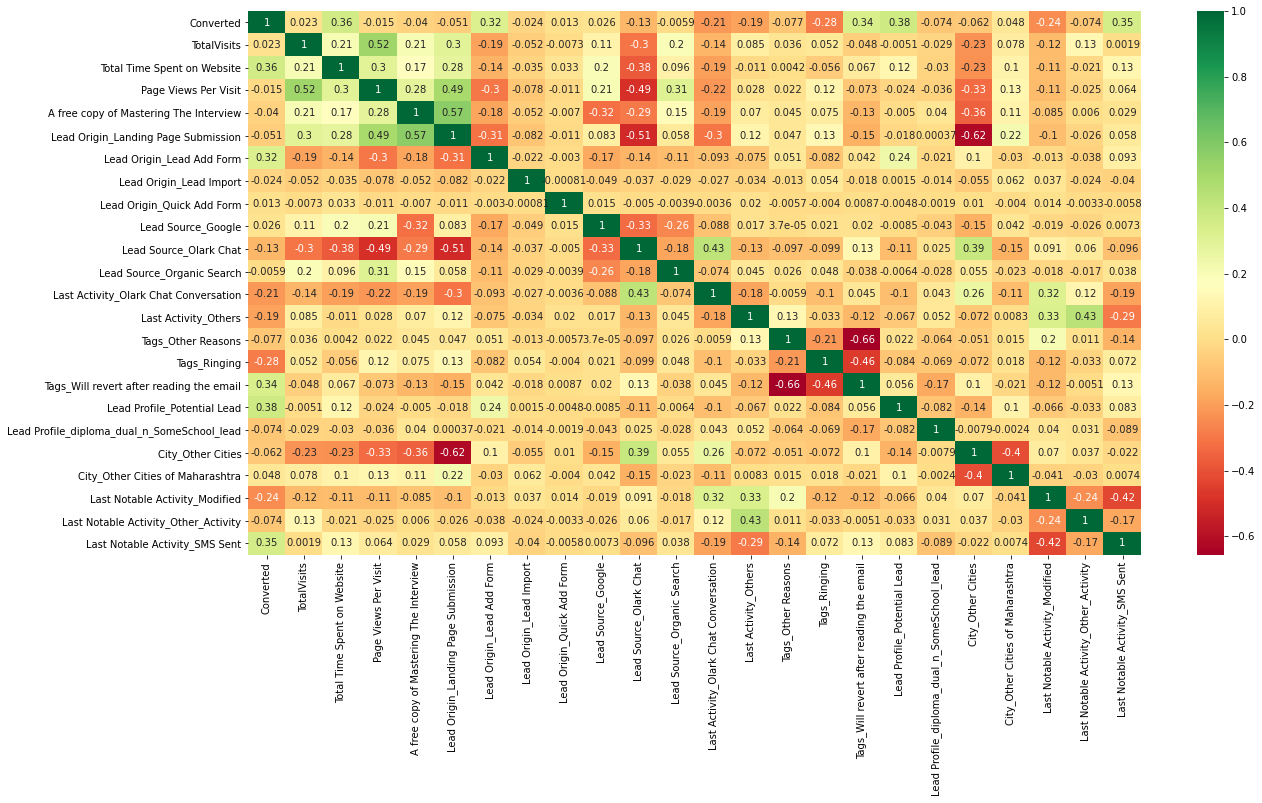

In [240]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads.corr(),annot = True , cmap = 'RdYlGn')
plt.show()